2022-07-02 07:45:52.352484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-02 07:45:52.352519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


X_train shape: (16, 128, 128, 3)
16 train samples
4 test samples


2022-07-02 07:45:58.454533: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-02 07:45:58.454555: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-02 07:45:58.454570: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pendlimarri): /proc/driver/nvidia/version does not exist
2022-07-02 07:45:58.454716: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-02 07:45:58.939585: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Op

Epoch 1/20
1/1 [==============================] - 14s 14s/step - loss: 0.6911 - accuracy: 0.5625
Epoch 2/20
1/1 [==============================] - 0s 179ms/step - loss: 0.6794 - accuracy: 0.5625
Epoch 3/20
1/1 [==============================] - 0s 183ms/step - loss: 0.6685 - accuracy: 0.6875
Epoch 4/20
1/1 [==============================] - 0s 178ms/step - loss: 0.6518 - accuracy: 0.6875
Epoch 5/20
1/1 [==============================] - 0s 227ms/step - loss: 0.6322 - accuracy: 0.6875
Epoch 6/20
1/1 [==============================] - 0s 179ms/step - loss: 0.6120 - accuracy: 0.6875
Epoch 7/20
1/1 [==============================] - 0s 193ms/step - loss: 0.5941 - accuracy: 0.6875
Epoch 8/20
1/1 [==============================] - 0s 179ms/step - loss: 0.5913 - accuracy: 0.6875
Epoch 9/20
1/1 [==============================] - 0s 237ms/step - loss: 0.6038 - accuracy: 0.6875
Epoch 10/20
1/1 [==============================] - 0s 180ms/step - loss: 0.5551 - accuracy: 0.6875
Epoch 11/20
1/1 [===

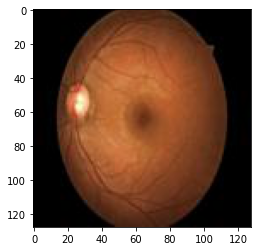

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from PIL import Image
from numpy import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

img_rows, img_cols = 128, 128
img_channels = 1


path1='/home/pendlimarri/eyes'
path2='/home/pendlimarri/eyes resized'


img_rows=128
img_cols=128
listing = os.listdir(path1)
num_samples = size(listing)

for file in listing:
    im= Image.open(path1 + '/' + file)
    img=im.resize((img_rows,img_cols))
    gray=img
    gray.save(path2+'/'+file, "JPEG")

imlist= os.listdir(path2)

im1=array(Image.open('/home/pendlimarri/eyes resized' + '/'+ imlist[0]))
m,n=im1.shape[0:2]
imnbr = len(imlist)

immatrix = array([array(Image.open('/home/pendlimarri/eyes resized' + '/' + im2)).flatten() for im2 in imlist],'f')
label=np.ones((num_samples,),dtype = int)

label = [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]

data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]
img=immatrix[8].reshape(img_rows,img_cols,3)
plt.imshow(uint8(img))

batch_size = 32
nb_classes = 2
nb_epoch = 5

nb_filters = 32
nb_pool=2
nb_conv=3

(X, y)=(train_data[0],train_data[1])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=4)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

k = np_utils.to_categorical(y_train, nb_classes)
kt = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(64, (3,3), activation='relu', input_shape=(128,128,3), data_format='channels_last',padding='same'))
convout1 = Activation('relu')
model.add(convout1)

model.add(Convolution2D(64, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)

model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))



model.add(Convolution2D(128,nb_conv,nb_conv))
convout3 = Activation('relu')
model.add(convout3)


model.add(MaxPooling2D(pool_size=(nb_pool,nb_pool)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs=20;
hist = model.fit(np.array(X_train), np.array(k), batch_size=batch_size, epochs=epochs, shuffle=True)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


In [3]:
iris=pd.read_csv('1601694-Retinopathy.csv')
iris

,image,level,image_shape,image_size,height,width,channel
0,1_left,0,"(2336, 3504, 3)",1147508,2336,3504,3
1,1_right,0,"(2336, 3504, 3)",1183978,2336,3504,3
2,2_left,0,"(1920, 2560, 3)",359372,1920,2560,3
3,2_right,0,"(1920, 2560, 3)",376230,1920,2560,3
4,3_left,0,"(1920, 2560, 3)",481639,1920,2560,3
...,...,...,...,...,...,...,...
53571,44346_right,0,"(2592, 3888, 3)",1427191,2592,3888,3
53572,44350_left,0,"(2592, 3888, 3)",1115948,2592,3888,3
53573,44350_right,0,"(2592, 3888, 3)",1148557,2592,3888,3
53574,44351_left,0,"(1944, 2592, 3)",673356,1944,2592,3


In [4]:
iris.isnull().sum()

image          0
level          0
image_shape    0
image_size     0
height         0
width          0
channel        0
dtype: int64

In [5]:
iris.corr()

,level,image_size,height,width,channel
level,NaN,NaN,NaN,NaN,NaN
image_size,NaN,1.000000,0.790004,0.809092,NaN
height,NaN,0.790004,1.000000,0.989981,NaN
width,NaN,0.809092,0.989981,1.000000,NaN
channel,NaN,NaN,NaN,NaN,NaN


In [6]:
import seaborn as sns

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='image_size', ylabel='height'>

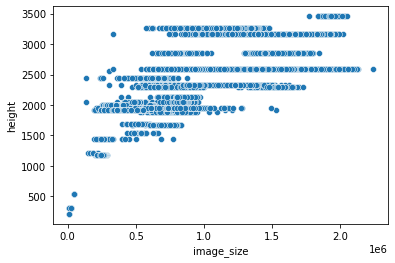

In [7]:
sns.scatterplot(iris.image_size,iris.height)

/home/pendlimarri/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='image_size', ylabel='width'>

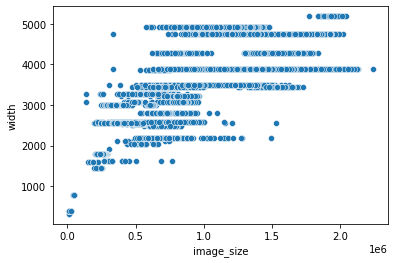

In [8]:
sns.scatterplot(iris.image_size,iris.width)

In [9]:
numnames=iris.dtypes[iris.dtypes!='object']

In [10]:
numnames

level         int64
image_size    int64
height        int64
width         int64
channel       int64
dtype: object

In [11]:
objnames=iris.dtypes[iris.dtypes=='object'].index
objnames

Index(['image', 'image_shape'], dtype='object')

In [12]:
iris.columns

Index(['image', 'level', 'image_shape', 'image_size', 'height', 'width',
       'channel'],
      dtype='object')

<AxesSubplot:>

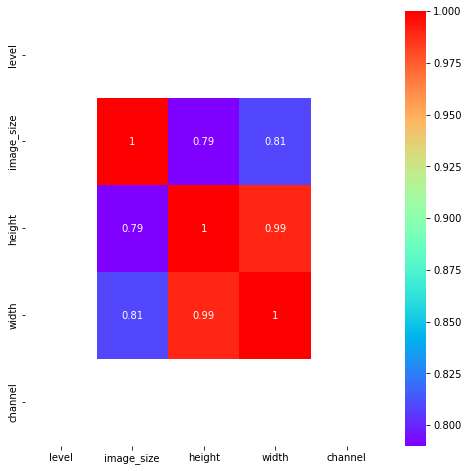

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(iris.corr(),annot=True,cmap='rainbow')

In [14]:
X=iris[['image_size','height','width']].values
X.shape

(53576, 3)

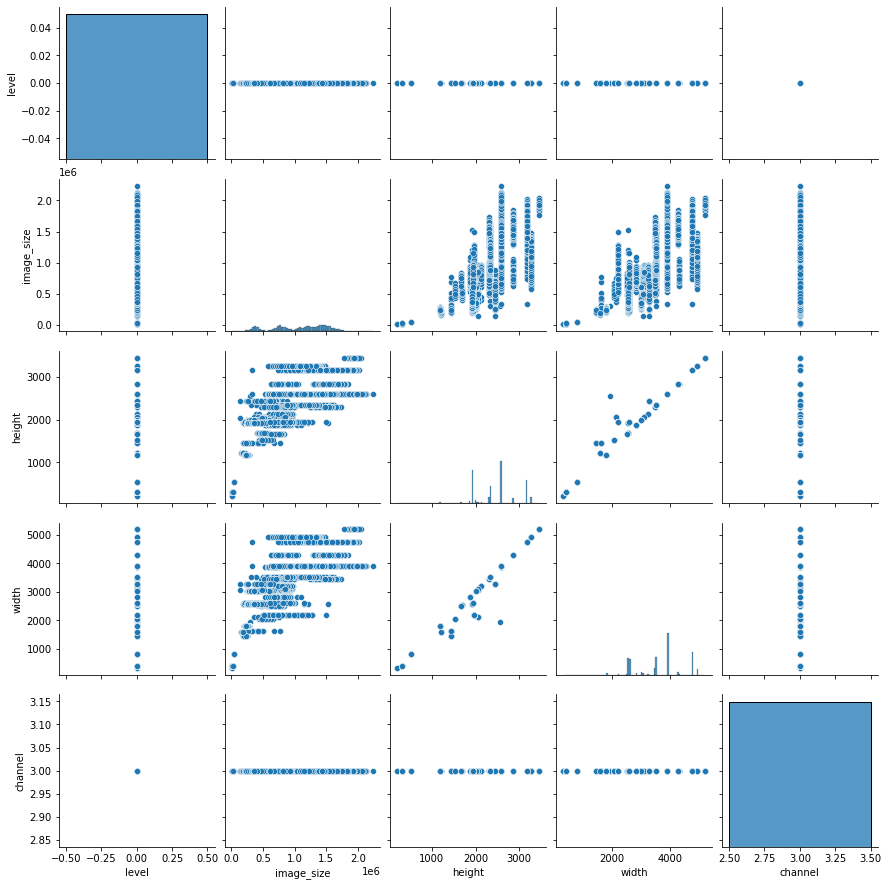

In [15]:
sns.pairplot(iris)

In [16]:
y=iris['channel'].values
y.shape

(53576,)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


"'\nfrom sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ny=le.fit_transform(y)\n"

In [20]:
'''y=label_binarize(y, classes=[3])
n_classes = y.shape[1]'''

In [23]:
#ndim(n_classes)

0